In [ ]:
!pip install mistralai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 973.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from mistralai.client import MistralClient



import os


os.environ["MISTRAL_API_KEY"] = "<your mistral API key here>"

# Instantiate the MistralClient to create a client object
client = MistralClient()

# Use the client object to list all available models
models = client.list_models()

# Iterate over the list of models and print each one on a new line
for model in models.data:
    print(model.id)


open-mistral-7b
mistral-tiny-2312
mistral-tiny
open-mixtral-8x7b
open-mixtral-8x22b
open-mixtral-8x22b-2404
mistral-small-2312
mistral-small
mistral-small-2402
mistral-small-latest
mistral-medium-latest
mistral-medium-2312
mistral-medium
mistral-large-latest
mistral-large-2402
codestral-2405
codestral-latest
mistral-embed


In [ ]:
sample_sentence = "A young wizard fights evil."
sample_embed = client.embeddings(model="mistral-embed", input= sample_sentence)
clean_sample_embed =  sample_embed.data[0].embedding
print(len(clean_sample_embed))
print(clean_sample_embed[:10])

1024
[-0.032501220703125, -0.0029010772705078125, 0.0643310546875, 0.020538330078125, 0.008148193359375, 0.02099609375, 0.0465087890625, -0.0034236907958984375, -0.0223388671875, -0.057952880859375]


In [ ]:
dish_descriptions = [
    "Grilled steak with garlic butter",       # Meat
    "Seared salmon with lemon dill sauce",    # Fish
    "Roasted vegetable medley with herbs",    # Veggie
    "Spicy tofu stir-fry with vegetables",    # Asian
    "Tacos with spicy chicken and salsa",     # Mexican
    "Spicy chili con carne with beans",       # Spicy
    "Chocolate lava cake with vanilla ice cream",  # Sweet
    "Creamy tomato basil soup",               # Liquid
    "Cheeseburger with fries",                # Fast
    "Seared scallops with truffle oil",       # Fine
]

dish_embeds = client.embeddings(model="mistral-embed", input=dish_descriptions)
dish_embeds_arr = []


for embed in dish_embeds.data:
  dish_embeds_arr.append(embed.embedding)

print(len(dish_embeds_arr))
print(len(dish_embeds_arr[0]))

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
clean_embed = []

for embed in dish_embeds.data:
  clean_embed.append(embed.embedding)

print(clean_embed[2][:10])


[-0.0207977294921875, 0.01544189453125, 0.050323486328125, -0.0026397705078125, -0.00760650634765625, 0.00821685791015625, 0.0034198760986328125, -0.00811004638671875, -0.0272674560546875, -0.0474853515625]


In [ ]:
user_input = input("What do you prefer for dinner? ")
user_embed = client.embeddings(model="mistral-embed", input=user_input).data[0].embedding
user_embed[:10]

What do you prefer for dinner? hot dog


[-0.0123748779296875,
 -0.00995635986328125,
 0.0190277099609375,
 0.046356201171875,
 0.01195526123046875,
 0.0177154541015625,
 0.006557464599609375,
 -0.0210723876953125,
 -0.0021228790283203125,
 0.01029205322265625]

In [ ]:
from scipy.spatial.distance import cosine

print (1 - cosine(user_embed, dish_embeds_arr[0]))
print (1 - cosine(user_embed, dish_embeds_arr[1]))
print (1 - cosine(user_embed, dish_embeds_arr[2]))

0.6602092428814766
0.63926523693931
0.6431461336176675


In [ ]:
from scipy.spatial.distance import cosine, cdist
import numpy as np

distances = cdist(np.array(user_embed).reshape(1, -1), dish_embeds_arr, "cosine")

mostRelevant = np.argmin(distances) #index of the most relevant movie

print(f"most relevant index: {mostRelevant}")
print(f"Then you might find tasty: {dish_descriptions[mostRelevant]}")



most relevant index: 8
Then you might find tasty: Cheeseburger with fries


In [ ]:
#81394d0e-f349-48b6-b3f8-08eda05827dc

In [ ]:
!pip install pinecone-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pinecone

os.environ["PINECONE_API_KEY"] = "<your Pinecone API key here>"

from pinecone import Pinecone, ServerlessSpec

pcone = Pinecone()


In [ ]:
pcone.create_index(
        name='dish-embeddings', dimension=1024, metric='cosine',
        spec=ServerlessSpec(cloud='aws', region='us-east-1')
    )


PineconeApiException: (409)
Reason: Conflict
HTTP response headers: HTTPHeaderDict({'content-type': 'text/plain; charset=utf-8', 'x-pinecone-api-version': '2024-04', 'access-control-allow-origin': '*', 'vary': 'origin,access-control-request-method,access-control-request-headers', 'access-control-expose-headers': '*', 'X-Cloud-Trace-Context': '9f0e1079d471d19149089c3a9fd644c3', 'Date': 'Tue, 18 Jun 2024 05:13:05 GMT', 'Server': 'Google Frontend', 'Content-Length': '85', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: {"error":{"code":"ALREADY_EXISTS","message":"Resource  already exists"},"status":409}


In [ ]:
index = pcone.Index('dish-embeddings')

In [ ]:
for i, embed in enumerate(dish_embeds_arr):
    index.upsert([(f'dish_{i}', embed)])

In [ ]:
result = index.query(vector=[user_embed], top_k=1)
closest_dish_id = result['matches'][0]['id']
print(closest_dish_id)
closest_dish_index = int(closest_dish_id.split('_')[1])
print(closest_dish_index)
print(dish_descriptions[closest_dish_index])

dish_8
8
Cheeseburger with fries


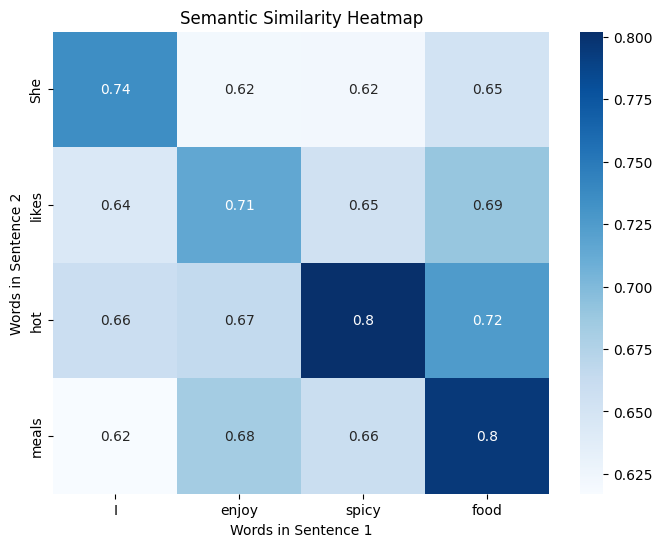

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Define the sentences and words
sentence1 = ["I", "enjoy", "spicy", "food"]
sentence2 = ["She", "likes", "hot", "meals"]

# Generate embeddings for each word
embeddings1 = client.embeddings(model="mistral-embed", input=sentence1)
embeddings2 = client.embeddings(model="mistral-embed", input=sentence2)

# Clean embed arrays
embeddings1_arr = []
embeddings2_arr = []

for embed in embeddings1.data:
  embeddings1_arr.append(embed.embedding)

for embed in embeddings2.data:
  embeddings2_arr.append(embed.embedding)


# Compute cosine similarity between each pair of words
similarity_scores = cosine_similarity(embeddings2_arr, embeddings1_arr)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_scores, annot=True, cmap='Blues', xticklabels=sentence1, yticklabels=sentence2)

# Set titles and labels
plt.title('Semantic Similarity Heatmap')
plt.xlabel('Words in Sentence 1')
plt.ylabel('Words in Sentence 2')

# Show the heatmap
plt.show()

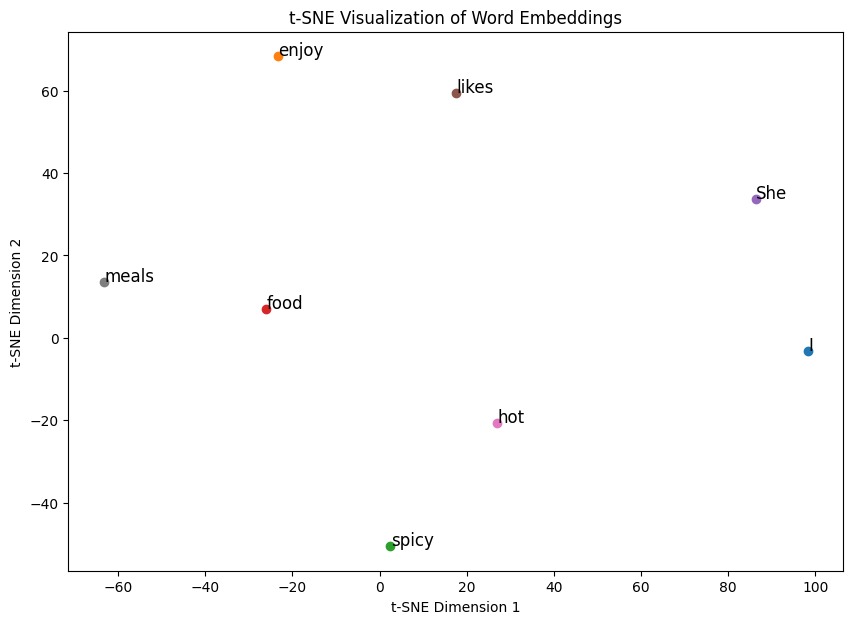

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# Define the sentences and words
sentence1 = ["I", "enjoy", "spicy", "food"]
sentence2 = ["She", "likes", "hot", "meals"]

# Generate embeddings for each word
embeddings1 = client.embeddings(model="mistral-embed", input=sentence1)
embeddings2 = client.embeddings(model="mistral-embed", input=sentence2)

# Clean embed arrays
embeddings1_arr = []
embeddings2_arr = []

for embed in embeddings1.data:
    embeddings1_arr.append(embed.embedding)

for embed in embeddings2.data:
    embeddings2_arr.append(embed.embedding)

# Combine embeddings and create labels
combined_embeddings = np.array(embeddings1_arr + embeddings2_arr)
labels = sentence1 + sentence2

# Use t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(combined_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
for i, label in enumerate(labels):
    x, y = tsne_results[i, :]
    plt.scatter(x, y)
    plt.text(x+0.1, y+0.1, label, fontsize=12)

plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

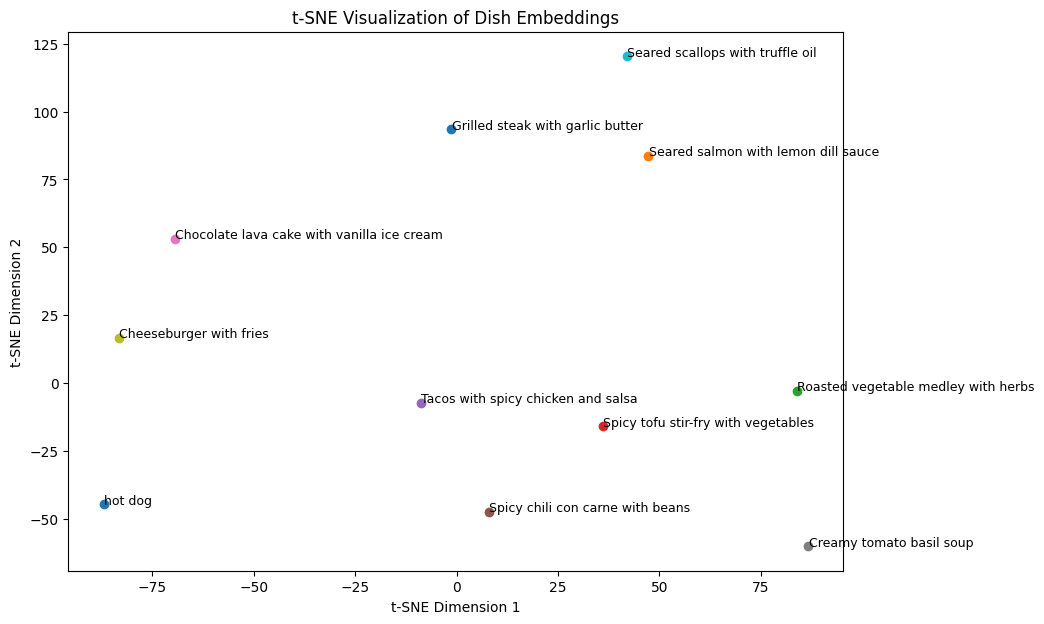

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


dish_embeds_arr.append(user_embed)
dish_descriptions.append(user_input)

dish_embeds_np_arr = np.array(dish_embeds_arr)
# Use t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(dish_embeds_np_arr)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
for i, label in enumerate(dish_descriptions):
    x, y = tsne_results[i, :]
    plt.scatter(x, y)
    plt.text(x + 0.1, y + 0.1, label, fontsize=9)

plt.title('t-SNE Visualization of Dish Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

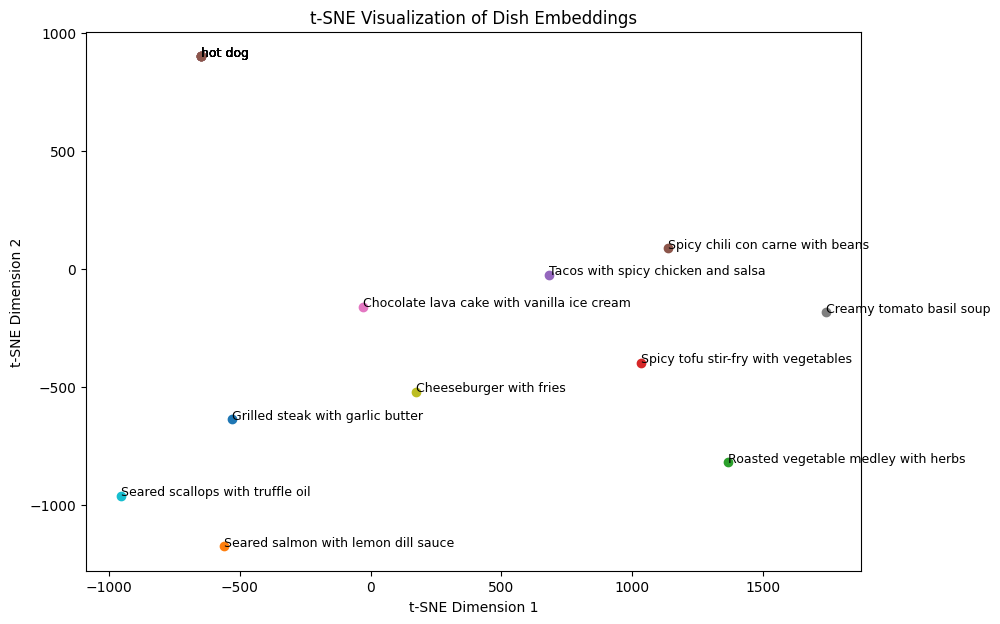

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Add user input embedding to dish embeddings
dish_embeds_arr.append(user_embed)
dish_descriptions.append(user_input)

# Convert list of embeddings to a NumPy array
dish_embeds_np_arr = np.array(dish_embeds_arr)

# Use t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(dish_embeds_np_arr)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
for i, label in enumerate(dish_descriptions):
    x, y = tsne_results[i, :]
    plt.scatter(x, y)
    plt.text(x + 0.1, y + 0.1, label, fontsize=9)

plt.title('t-SNE Visualization of Dish Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()